<a href="https://colab.research.google.com/github/prakash-bisht/NN_architecture_from-_scratch/blob/main/U_Net_3D_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

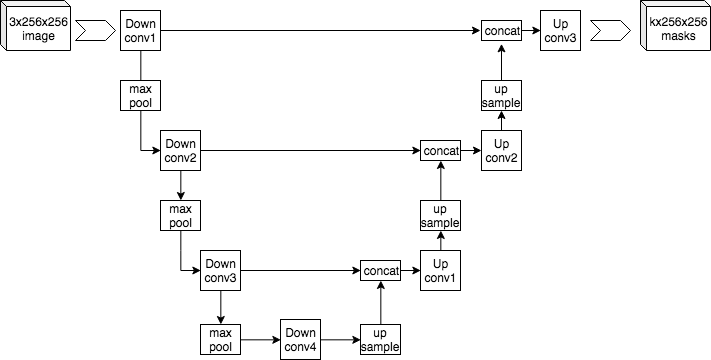

In [ ]:
from IPython.display import Image
Image(filename='/content/U-net.png')

In [ ]:
import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU,Conv3DTranspose
from keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
K.set_image_data_format("channels_first")

In [ ]:
'----The "depth" of your U-Net-----'
# The "depth" of your U-Net is equal to the number of down-convolutions you will use. In the image above, 
# the depth is 4 because there are 4 down-convolutions running down the left side including 
# the very bottom of the U.
# For this exercise, you'll use a U-Net depth of 2, meaning you'll have 2 down-convolutions in your network.

In [ ]:
# The shape of the input layer is (num_channels, height, width, length), 
# where num_channels you can think of like color channels in an image, height, width and length 
# are just the size of the input.

In [ ]:
input_layer = Input(shape=(4,160,160,16))
input_layer 

<KerasTensor: shape=(None, 4, 160, 160, 16) dtype=float32 (created by layer 'input_1')>

#down convolution

In [ ]:
#Depth 0 
#The formula to use for calculating the number of filters is:
#Where i is the current depth.
#So at depth i = 0:
#filters_{0} = 32 \times (2^{0}) = 32
#filters_{0} = 32 \times (2^{0}) = 32
#There are two convolutional layers for each depth

In [ ]:
#layer 0 
down_depth_0_layer_0 = Conv3D(filters=32,
                              kernel_size=(3,3,3),
                              padding='same',
                              strides=(1,1,1))(input_layer)
down_depth_0_layer_0 

<KerasTensor: shape=(None, 32, 160, 160, 16) dtype=float32 (created by layer 'conv3d')>

In [ ]:
down_depth_0_layer_0 = Activation('relu')(down_depth_0_layer_0)
down_depth_0_layer_0

<KerasTensor: shape=(None, 32, 160, 160, 16) dtype=float32 (created by layer 'activation')>

In [ ]:
#Depth 0, Layer 1
# For layer 1 of depth 0, the formula for calculating the number of filters is:
#filters_{i} = 32 \times (2^{i}) \times 2
down_depth_0_layer_1 = Conv3D(filters=64,
                              kernel_size=(3,3,3),
                              padding='same',
                              strides=(1,1,1))(down_depth_0_layer_0)
down_depth_0_layer_1 = Activation('relu')(down_depth_0_layer_1)
down_depth_0_layer_1

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_1')>

In [ ]:
# Max pooling
# Within the U-Net architecture, there is a max pooling operation after each of the down-convolutions
# (not including the last down-convolution at the bottom of the U). In general, this means 
# you'll add max pooling after each down-convolution up to (but not including) 
# the depth - 1 down-convolution (since you started counting at 0).

# For this lab exercise:

# The overall depth of the U-Net you're constructing is 2
# So the bottom of your U is at a depth index of: 2 - 1 = 1.
# So far you've only defined the depth = 0 down-convolutions, so the next thing to do is add max pooling

In [ ]:
down_depth_0_layer_pool = MaxPooling3D(pool_size=(2,2,2))(down_depth_0_layer_1)
down_depth_0_layer_pool

<KerasTensor: shape=(None, 64, 80, 80, 8) dtype=float32 (created by layer 'max_pooling3d')>

In [ ]:
#Depth 1, Layer 0
down_depth_1_layer_0 = Conv3D(filters=64,
                              kernel_size=(3,3,3),
                              padding='same',
                              strides=(1,1,1)
                              )(down_depth_0_layer_pool)
down_depth_1_layer_0 = Activation('relu')(down_depth_1_layer_0)
down_depth_1_layer_0

<KerasTensor: shape=(None, 64, 80, 80, 8) dtype=float32 (created by layer 'activation_2')>

In [ ]:
#Depth 1, Layer 1
down_depth_1_layer_1 = Conv3D(filters=128,
                              kernel_size=(3,3,3),
                              padding='same',
                              strides=(1,1,1)
                              )(down_depth_1_layer_0)
down_depth_1_layer_1 = Activation('relu')(down_depth_1_layer_1)
down_depth_1_layer_1

<KerasTensor: shape=(None, 128, 80, 80, 8) dtype=float32 (created by layer 'activation_3')>

#upward

In [ ]:
#The image's (height, width, length) all get larger in the expanding path.

In [ ]:
up_depth_0_layer_0 = UpSampling3D(size=(2,2,2))(down_depth_1_layer_1)
up_depth_0_layer_0

<KerasTensor: shape=(None, 128, 160, 160, 16) dtype=float32 (created by layer 'up_sampling3d')>

In [ ]:
# Print the shape of layers to concatenate
print(up_depth_0_layer_0)
print()
print(down_depth_0_layer_1)

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 160, 160, 16), dtype=tf.float32, name=None), name='up_sampling3d/concat_2:0', description="created by layer 'up_sampling3d'")

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 160, 160, 16), dtype=tf.float32, name=None), name='activation_1/Relu:0', description="created by layer 'activation_1'")


In [ ]:
up_depth_1_concat = concatenate([up_depth_0_layer_0,down_depth_0_layer_1],axis=1)
up_depth_1_concat

<KerasTensor: shape=(None, 192, 160, 160, 16) dtype=float32 (created by layer 'concatenate')>

In [ ]:
#The number of filters for this layer will be set to the number of channels in the down-convolution's layer 1 
#at the same depth of 0 (down_depth_0_layer_1).

In [ ]:
up_depth_1_layer_1 = Conv3D(filters=64,
                            kernel_size=(3,3,3),
                            strides=(1,1,1),
                            padding='same')(up_depth_1_concat) 
up_depth_1_layer_1 = Activation('relu')(up_depth_1_layer_1)
up_depth_1_layer_1

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_4')>

In [ ]:
up_depth_1_layer_2 = Conv3D(filters=64,
                            kernel_size=(3,3,3),
                            strides=(1,1,1),
                            padding='same')(up_depth_1_layer_1) 
up_depth_1_layer_2 = Activation('relu')(up_depth_1_layer_2)
up_depth_1_layer_2

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_5')>

#final_convolutions

In [ ]:
final_conv = Conv3D(filters=3,
                    kernel_size=(1,1,1),
                    strides=(1,1,1),
                    padding='valid')(up_depth_1_layer_2) 
final_conv

<KerasTensor: shape=(None, 3, 160, 160, 16) dtype=float32 (created by layer 'conv3d_6')>

In [ ]:
final_activation = Activation('sigmoid')(final_conv)
final_activation 

<KerasTensor: shape=(None, 3, 160, 160, 16) dtype=float32 (created by layer 'activation_6')>

In [ ]:
model = Model(inputs=input_layer,outputs=final_activation)
model.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 4, 160, 160  0           []                               
                                , 16)]                                                            
                                                                                                  
 conv3d (Conv3D)                (None, 32, 160, 160  3488        ['input_1[0][0]']                
                                , 16)                                                             
                                                                                                  
 activation (Activation)        (None, 32, 160, 160  0           ['conv3d[0][0]']                 
                                , 16)                                                         